# Team Members
 1. Kanika Saini
 2. Herleen Kaur Sanhotra
 3. Ankit Kejriwal
 4. Jaya Sindhura Sadam 


# Stores Sales Forecast 

**Sales at Walmart go up every holiday season. Some products are sold in large numbers when compared to other products. During Black Friday, for example, shoots up for all the products in electronics department, Clothing department, home decor department,etc.Making strategic decisions about the stock of these products in specific departments is to be made wisely. This project forecasts the sales for departments and various sales . Effects of various markdowns will also be shown where markdowns are the anonymous sales during the holiday season which tend to affect the sales.**

# Data Source 

**The data is downloaded from Kaggle : https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data .**

# Data Features Description

**Introduction to the Dataset:**

**The dataset contains records of 2 years data collected from 45 different Walmart stores for time period 5/2/2010 to 1/11/2012. We are working with 4 datasets train,features,stores and test(for testing our models).**

<font color = 'green'>**Train** dataset contains the following predictors:</font>

**Store** - the store number
<br>**Dept** - the department number
<br>**Date** - the week
<br>**IsHoliday** - whether the week is a special holiday week
<br>**Weekly_Sales** - sales for the given department in the given store
<br><br><font color = 'green'>**Features** dataset contains the following predictors:</font>
<br><br>**Store** - the store number
<br>**Date** - the week
<br>**Temperature** - average temperature in the region
<br>**Fuel_Price** - cost of fuel in the region
<br>**MarkDown1-5** - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Missing values are marked as NA.
<br>**CPI** - the consumer price index
<br>**Unemployment** - the unemployment rate
<br>**IsHoliday** - whether the week is a special holiday week
<br><br><font color = 'green'>**Stores** dataset contains the following predictors:</font>
<br><br>**Store** - the store number
<br>**Size**-size of store
<br>**Type**-type of store
<br><br><font color = 'green'>**Test** dataset contains the following predictors:</font>
<br><br>**Store** - the store number
<br>**Dept** - the department number
<br>**Date** - the week
<br>**IsHoliday** - whether the week is a special holiday week
**Goal/Target** variable:

Our aim is to predict the **Weekly Sales**. Therefore, Weekly_Sales is our target variable on which we will test the effects of other predictors.**

# CRISP-DM Process

# Importing the Dataset 

**Loading all the necessary packages**

In [80]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler 
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns


**Setting up the directory**

In [2]:
os.chdir("C:\\Users\\Kanika Saini\\Downloads\\Wallmart-sales forecast\\Wallmart-sales forecast")

**Importing all the datasets required**

In [65]:
features = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')
dt1 = pd.read_csv('train.csv')
dt2 = pd.read_csv('test.csv')

**Getting some information about the dataset using info method. It tells us about the shape of the dataset , data types of the features, etc**

In [60]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null object
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [61]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
Store    45 non-null int64
Type     45 non-null object
Size     45 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [62]:
dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [63]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
Store        115064 non-null int64
Dept         115064 non-null int64
Date         115064 non-null object
IsHoliday    115064 non-null bool
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


**We need to merge the datasets before further analysis. Below cell converts the Date attribute to Datetime datatype from object datatype**

In [66]:
features['Date'] = pd.to_datetime(features['Date'])
dt1['Date'] = pd.to_datetime(dt1['Date'])
test['Date'] = pd.to_datetime(test['Date'])

**Merging train and stores dataset based on Store attribute**

In [67]:
dataset  = pd.merge(dt1, stores, on='Store', how='left')

**Checking the first few rows and shape of the merged dataset**

In [68]:
dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


In [69]:
dataset.shape

(421570, 7)

**Merging the new dataset with features dataset on Store, Date and IsHoliday columns**

In [70]:
dataset = pd.merge(dataset,features, on=['Store','Date','IsHoliday'], how='left')

# Data Description

**Getting to know about the dataset using info method**

In [71]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(10), int64(3), object(1)
memory usage: 51.9+ MB


In [94]:
pd.crosstab(dataset['IsHoliday'],dataset['Type'],margins=True)

Type,A,B,C,All
IsHoliday,,,,
False,200293,151983,39633,391909
True,15185,11512,2964,29661
All,215478,163495,42597,421570


**Describing only the numeric columns**

In [73]:
dataset.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


**Describing all the attributes including the bool and Date attribute ,etc**

In [74]:
dataset.describe(include='all')

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570,421570.000000,421570,421570,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
unique,NaN,NaN,143,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2011-12-23 00:00:00,NaN,False,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,3027,NaN,391909,215478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,2010-02-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2012-10-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,22.200546,44.260317,NaN,15981.258123,NaN,NaN,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,NaN,22711.183519,NaN,NaN,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,NaN,-4988.940000,NaN,NaN,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,NaN,2079.650000,NaN,NaN,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000


# Data Cleaning and Pre-processing 

**Checking if the dataset contains NULL Values using isnull method. The following results show that there are zero NULL values in the Dept column and 270138 NULL values in the MarkDown 5 attribute**

In [75]:
dataset.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

**Imputing the missing values by a constant. The missing data here is replaced by a constant because the missing weekly sales in the MarkDown columns cannot be replaced by any other value because there were no sales at that time. It cannot be replaced by the mean, median or a random number. It would be unethical to assign sales for a store which might not have had in real time.**

In [77]:
dataset.fillna(value=-99999,inplace = True)

**Checking for NULL values again. We observe that there are no NULL values**

In [33]:
dataset.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

**The below cell has the variance of features. It can be seen that they have different ranges. So, Standardization is required to balance the variance. This will reduce the bias because without standardization, the results might be inclined towards the most predominant feature.**

In [89]:
dataset.var()

Store           1.634638e+02
Dept            9.297654e+02
Weekly_Sales    5.157979e+08
IsHoliday       6.540827e-02
Size            3.718632e+09
Temperature     3.403262e+02
Fuel_Price      2.102356e-01
MarkDown1       2.666183e+09
MarkDown2       2.097888e+09
MarkDown3       2.288123e+09
MarkDown4       2.338952e+09
MarkDown5       2.532540e+09
CPI             1.533449e+03
Unemployment    3.471872e+00
dtype: float64

**The following cell standardizes the dataset. 

In [91]:
scaler=StandardScaler()
dt=scaler.fit_transform(dataset[["Weekly_Sales","Temperature","CPI","Unemployment","Size","Fuel_Price","MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]])
dt=pd.DataFrame(dt,columns=["Weekly_Sales","Temperature","CPI","Unemployment","Size","Fuel_Price","MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"])
dataset=dataset.drop(["Weekly_Sales","Temperature","CPI","Unemployment","Size","Fuel_Price","MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"],axis=1)
frames=[dataset,dt]
dt=pd.concat(frames,axis=1) 

# Data Visualization

**The count of the store number for all the stores is almost equal and is close to 10000**

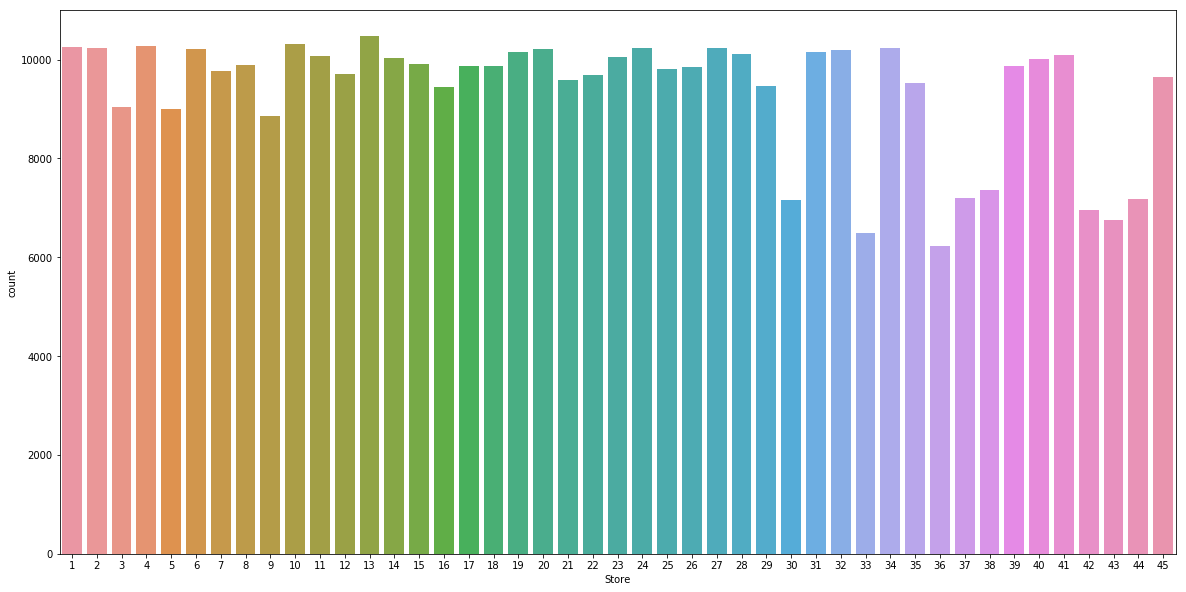

In [81]:
plt.figure(figsize=(20,10))
sns.countplot(dataset['Store'])

**The following plot shows the count of all the types of stores . It can be seen that there are more than 200000 stores of Type A whereas about 50000 stores of Type C.**

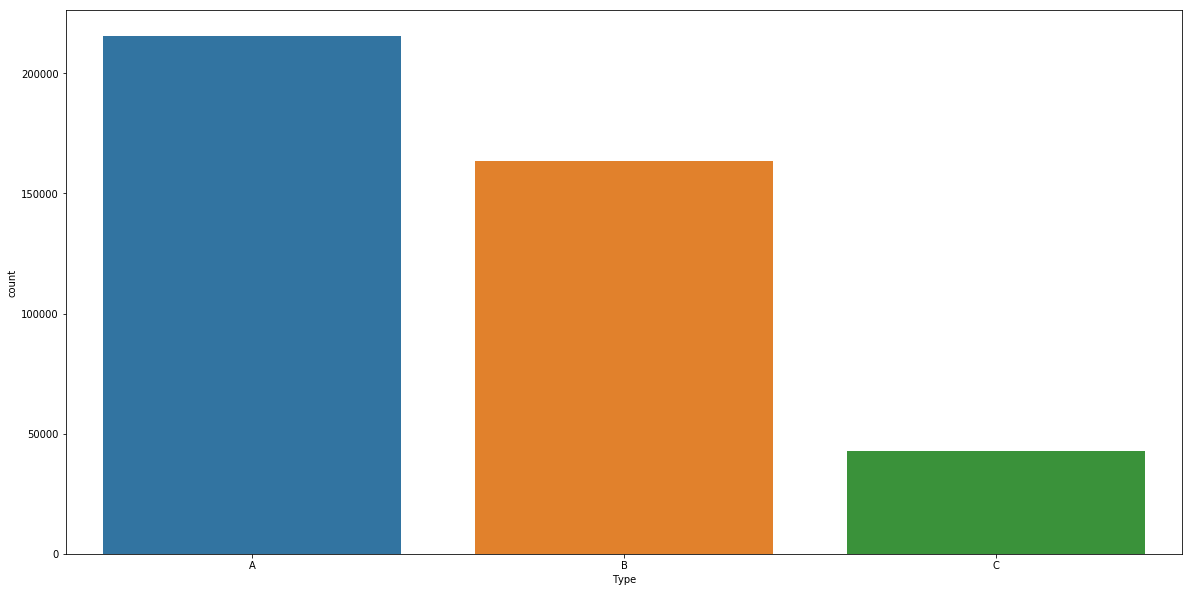

In [92]:
plt.figure(figsize=(20,10))
sns.countplot(dataset['Type'])

**From the below plot, it can be concluded that the number of non-working of walmart store is very less when compared to the working days in the span of two years. These holidays might be during public holidays where the superstores might be  open and others might not** 

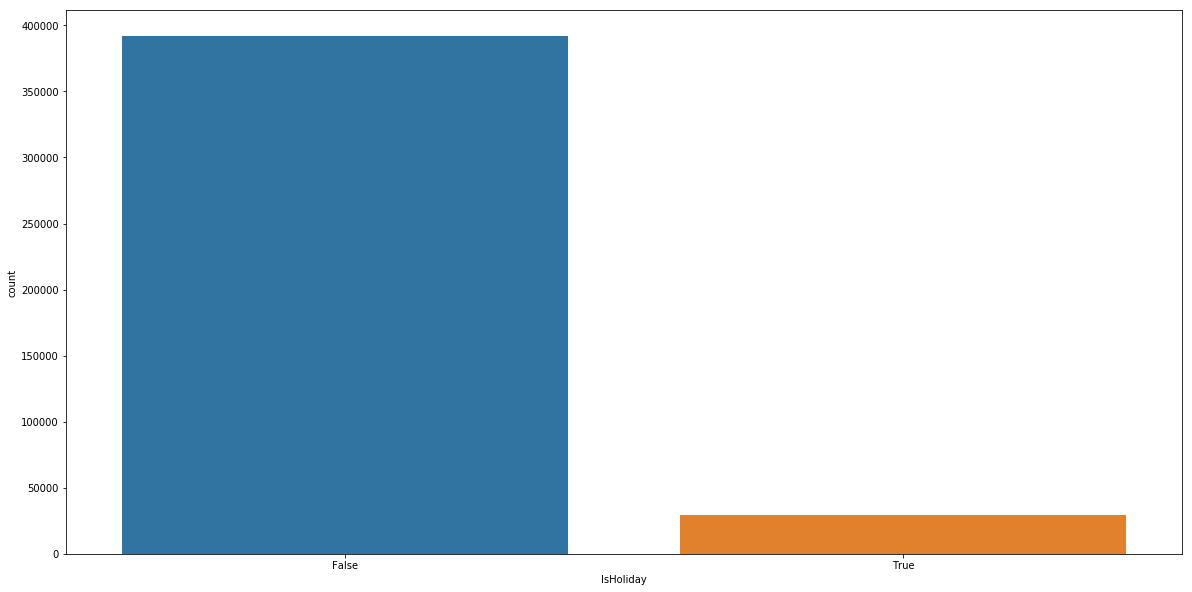

In [83]:
plt.figure(figsize=(20,10))
sns.countplot(dataset['IsHoliday'])

**Following plot shows the distribution of the Weekly Sales. It can be seen that the data is highly right skewed. Most of the weekly sales are below 100000.**

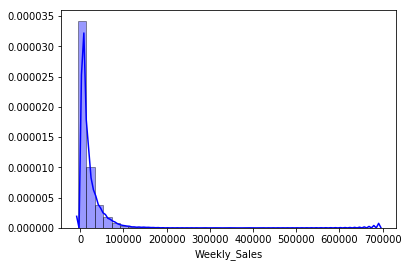

In [82]:
sns.distplot(dataset['Weekly_Sales'],hist='True', bins=int(180/5), color = 'blue',hist_kws={'edgecolor':'black'})

**The following histograms show the distributions of each feature. The outliers in the Markdown 1, Markdown 2 , Markdown 3, Markdown 4, Markdown 5 are the missing values that were imputed. The data in Temperature seems to be left skewed. Unemployment data, to some extent is normally distributed. The rest of the variables do not seem to have any distinct distribution.**

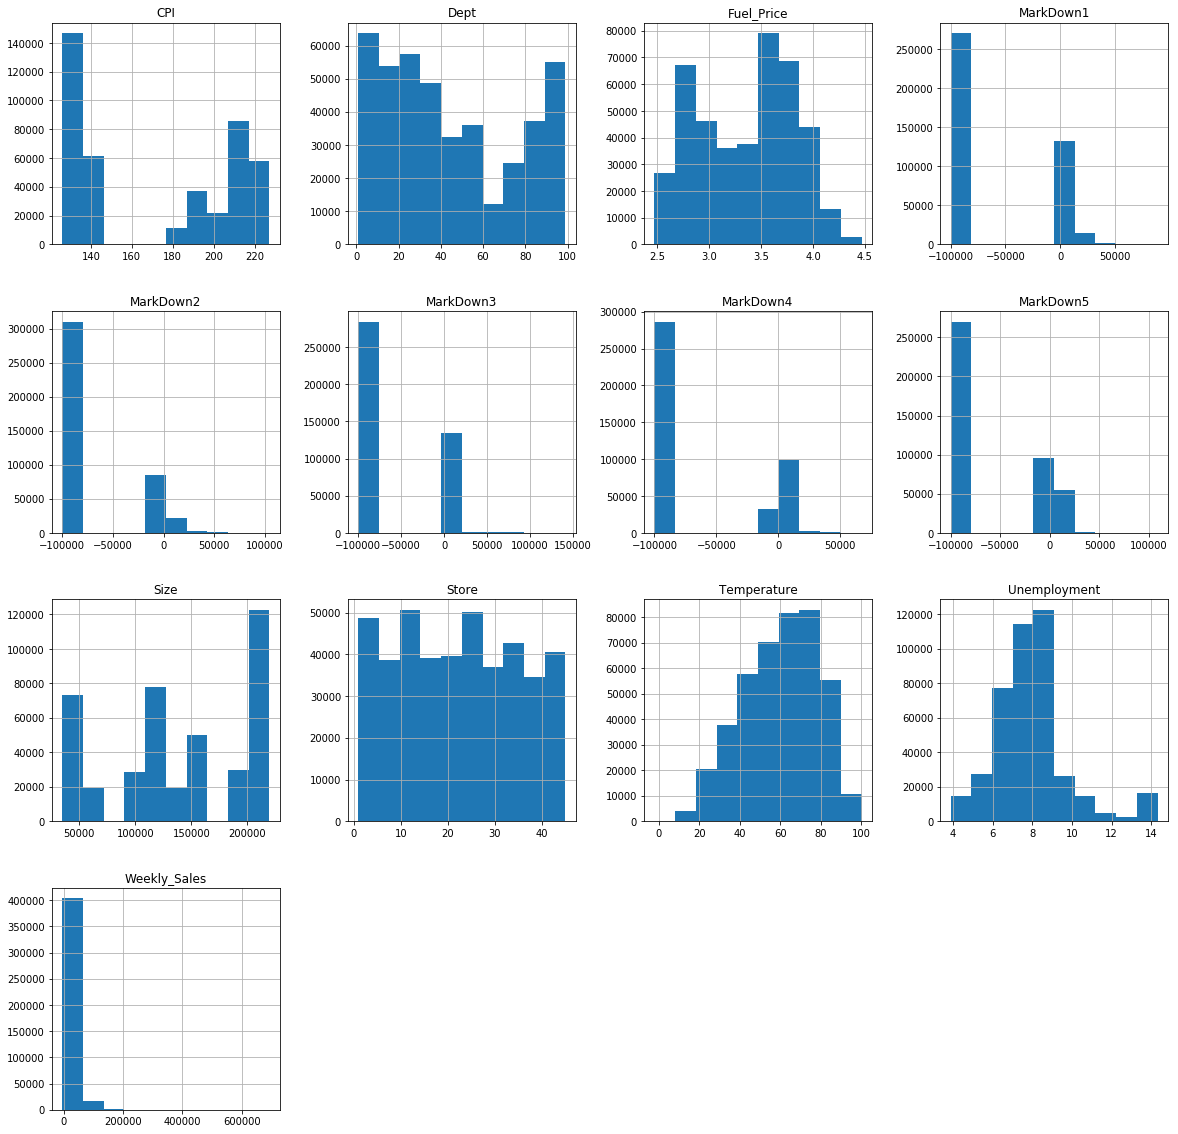

In [84]:
num=dataset.select_dtypes(include=['int64','float64'])
num.hist(figsize=(20,20))
plt.show()

**The following correlation table shows the correlation among all the features. An interesting correlation can be seen between Markdown 1, Markdown 2 , Markdown 3, Markdown 4,Markdown 5 and Fuel_Price.  Also, each Markdown feature is well correlated to each other. The size of the store is also slighly related to the weekly sales which is evident because, a large Walmart store will have higher sales when compared to a smaller Walmart store.Many negative correlations can also be seen. Unemployment rate is nowhere related to any of the markdowns. Customer Price index (CPI) and size have a slight correlation with the Markdowns.** 

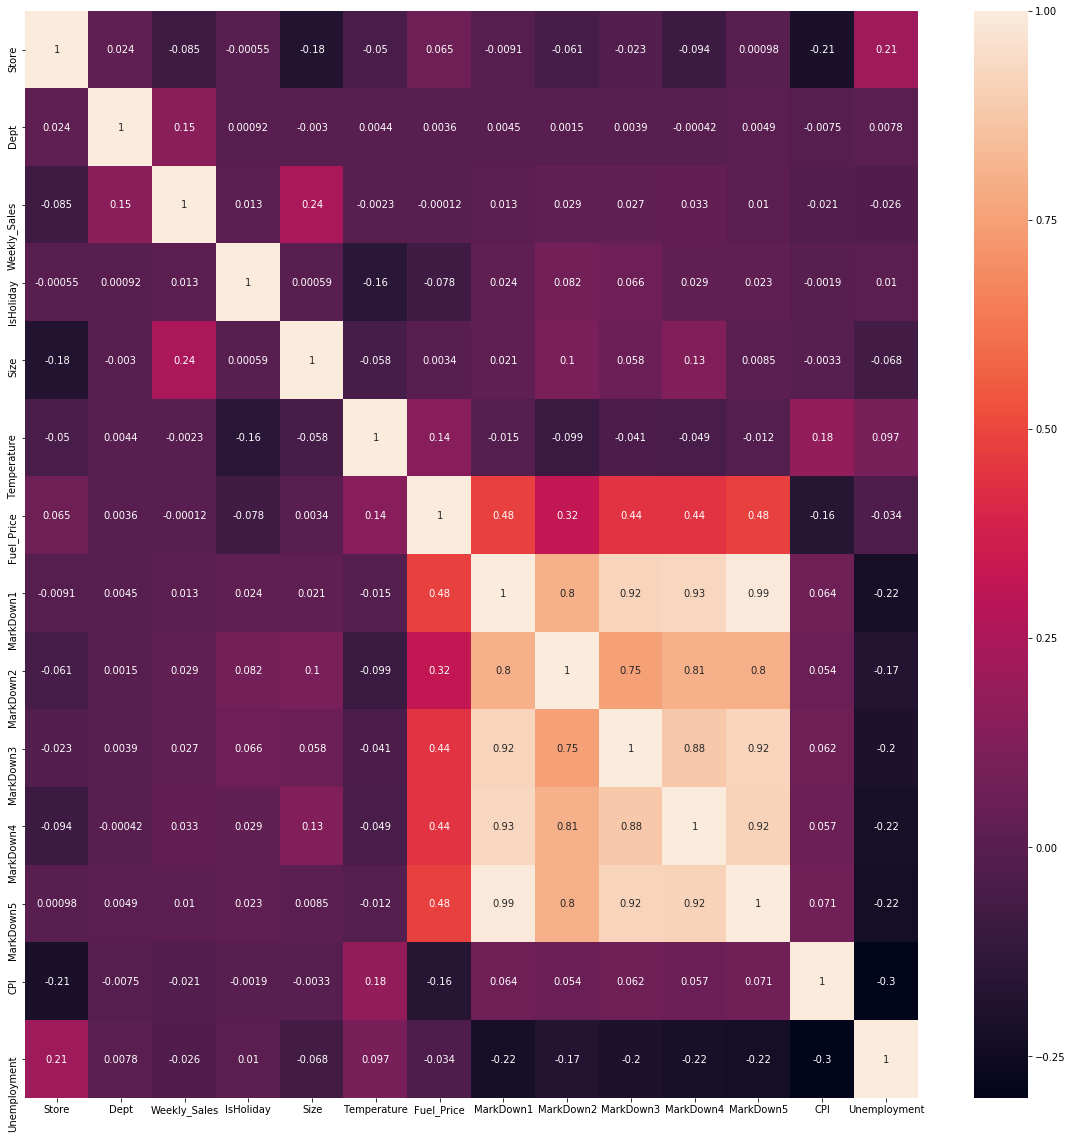

In [85]:
corr=dataset.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)

**The following cell shows the boxplot for Weekly Sales and IsHoliday feature. Firstly, we can see that there are many outliers for the boxes. These outliers might be because of the sales during the holidays where it shoots up. It can also be noticed that the data distribution for both the boxplots is almost the same except for the third quartile of IsHoliday= True.**

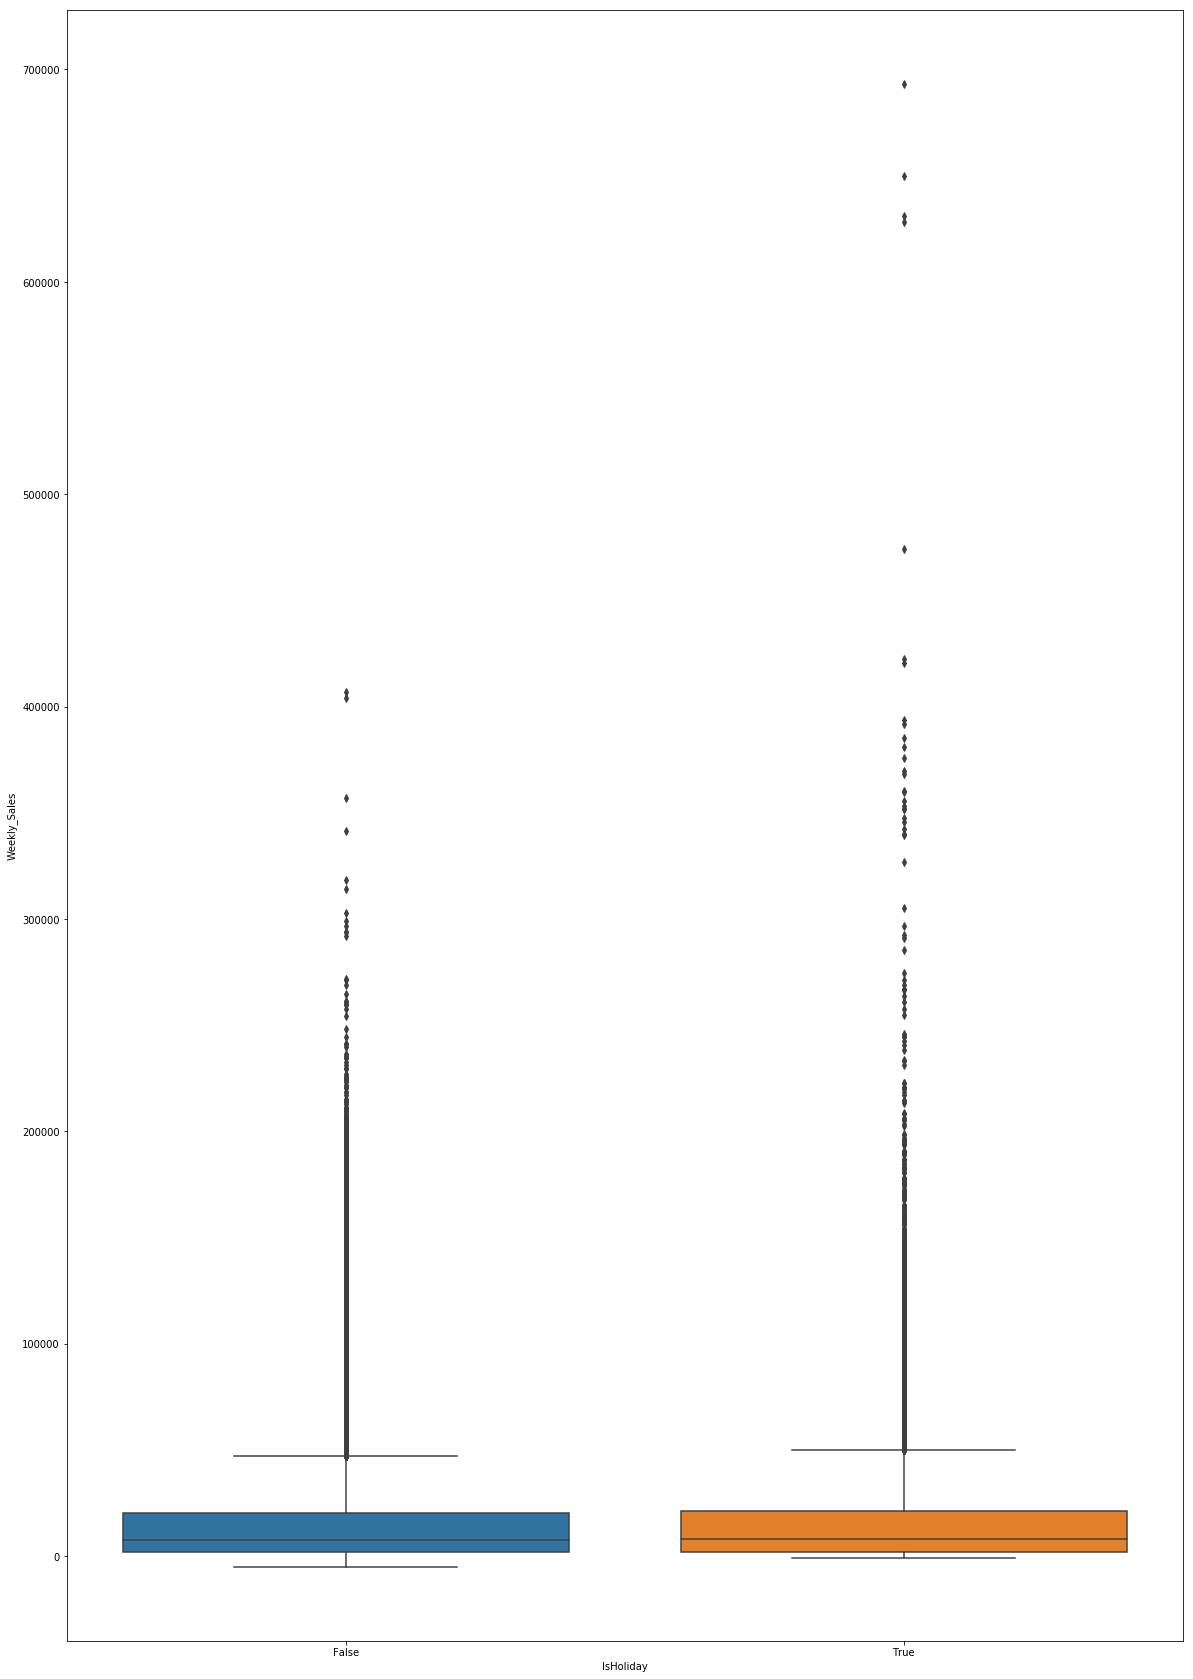

In [87]:
plt.figure(figsize=(20,30))
sns.boxplot(dataset['IsHoliday'],dataset['Weekly_Sales'])

**The following few cells are for plotting the t-SNE plot. t-SNE plot is used to visualize the high-dimensional data on a 2D plane. Currently, we are unable to plot it due to teh large dataset and limited resources. We will re-run it on Google Codelab and submit it in the next Deliverable.**

In [48]:
dtt=dataset.drop(['Date'],axis=1)

In [51]:
dtt=dtt.drop(['Type'],axis=1)

In [52]:
dtt.head(2)

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,24924.50,False,151315,42.31,2.572,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,211.096358,8.106
1,1,1,46039.49,True,151315,38.51,2.548,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,211.242170,8.106


In [ ]:
model= TSNE(learning_rate=200)
tsne_features=model.fit_transform(dtt)
xs=tsne_features[:,0]
ys=tsne_features[:,1]
plt.scatter(sx,ys)
plt.show()